## Introduction - Part 2: choosing binoms in a company matching



A manager must choose binoms among a set of employees in a company. However, while some employees may work together, others may not.. 

The manager would like to form a number of binoms that is as large as possible. Hence, The goal of this exercise is to perform a workers matching of largest size as possible.

We will choose two methods to apply the Erdös-Rendy random graph and compare their matching results at the end. Theses two method will determine the heuristic statistics of the graph, in therm of maximum and minimum number of edges own by a node. This number of nodes will determine their position by sorting the graph from the highest or lowest numbers first.

First of all, make sure you installed networkx, matplotlib, statistics inside your python .env (if you do not have them already). You can find all needed instructions as following the README.md file.

Then we can start the explanation, this function bellow is used to generate and visualize a graph on a window. 

This graph in the example is based on the Erdős-Rényi model to generate our workers as nodes and our "working together" connection as edges.

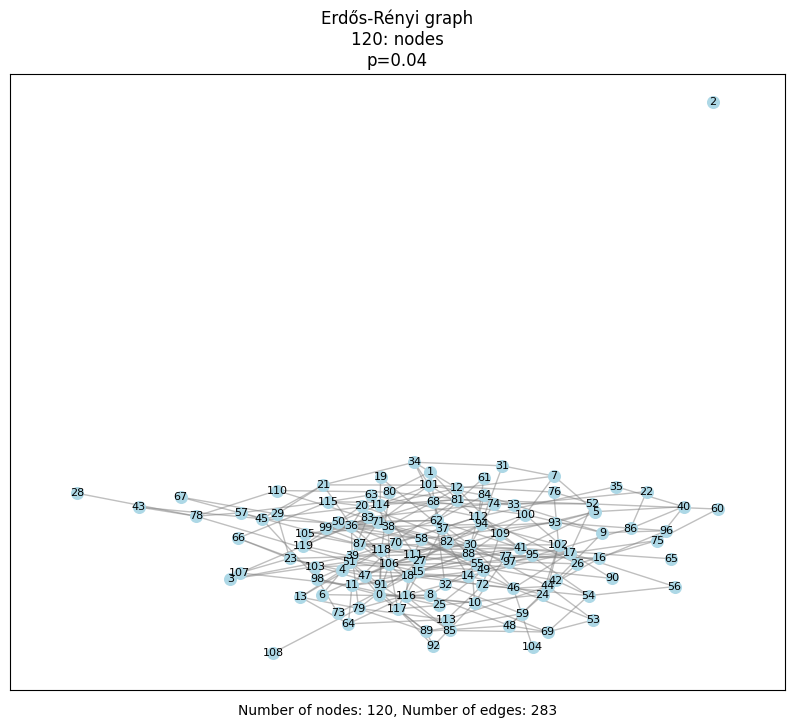

In [109]:
# file: exo2.1.py
import networkx as nx
import matplotlib.pyplot as plt

def generate_graph():
        # Generate Erdős-Rényi graph
        graph = nx.gnp_random_graph(120, 0.04)

        # set the window size
        plt.figure(figsize=(10, 8))
        # add to the generated graph a title and a description
        plt.title('Erdős-Rényi graph\n120: nodes\np=0.04')
        description = f"Number of nodes: {graph.number_of_nodes()}, Number of edges: {graph.number_of_edges()}"
        plt.text(0.5, -0.04, description, ha='center', transform=plt.gca().transAxes, color='black')
        
        # store nodes position to draw them and set the edges correctly
        nodes_position = nx.spring_layout(graph)  # positions for all nodes
        # Draw nodes with labels and edges between
        nx.draw_networkx_nodes(graph, nodes_position, node_size=70, node_color="lightblue")
        nx.draw_networkx_labels(graph, nodes_position, font_size=8, font_family="sans-serif")
        nx.draw_networkx_edges(graph, nodes_position, edgelist=graph.edges(), width=1.0, alpha=0.5, edge_color="gray")
        
        # Draw the graph on a window
        plt.show()

generate_graph()

*EXAMPLE GRAPH FIGURE 1*

This function performs a degree matching which select and sort nodes by the highest or lowest degrees first as is_reverse variable is set to True or False. (True = maximum degree first & False = minimum degree first).

In [102]:
# file: matching_function
def degree_matching(graph, is_reverse):
    matching = set()
    matched_nodes = set()
    # sorted the graph nodes by their degree (number of edges connected) from higher to lower when reverse is true and from lower to higher when it is false 
    sorted_nodes = sorted(graph.degree, key=lambda x: x[1], reverse=is_reverse)
    
    # for each workers inside the sorted workers list based on the max or min number of connection
    for node, degree in sorted_nodes:
        # if node is not inside the matched_nodes list (the worker have not pair yet)
        if node not in matched_nodes:
            # try to (here is a fix to manage wrong node number)
            try:
                # for each neighbor inside the founded neighbors list from the graph
                for neighbor in graph.neighbors(node):
                    # if neighbor is also not inside the matched_nodes
                    if neighbor not in matched_nodes:
                        # matching add new pair with the worker and his neighbor
                        matching.add((node, neighbor))
                        # both worker and neighbor are add inside the matched_nodes list
                        matched_nodes.add(node)
                        matched_nodes.add(neighbor)
                        # break the loop to select a new worker
                        break
            except KeyError as e:
                print(f"KeyError: {e}")
                print(f"Node {node} not found in graph.")
                continue

    return matching

*EXAMPLE GRAPH FIGURE 2 (all three graphs)*

*TESTING*

This function generate a Erdős-Rényi random graph, evaluates minimum and maximum matching heuristics on it, and displays the graph with highlighting the edges in red for the maximum degree match and in green for the minimum degree match.

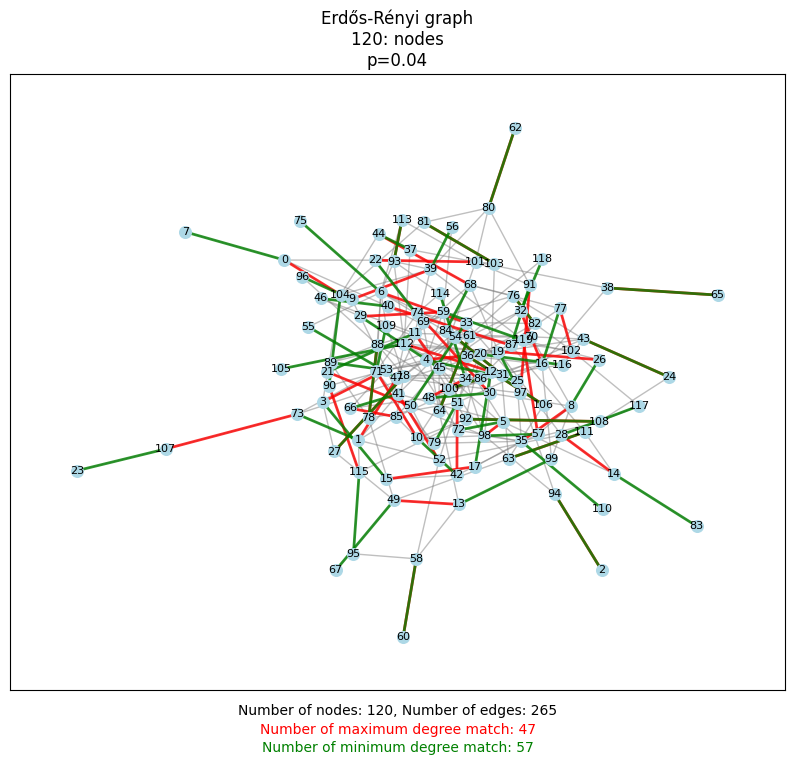

In [103]:
# file: exo2.2.py
import networkx as nx
import matplotlib.pyplot as plt
from matching_function import degree_matching

# run the matching function counting the time for each
def evaluate_heuristics(graph):
    max_degree_match = degree_matching(graph, True)
    min_degree_match = degree_matching(graph, False)

    return len(max_degree_match), len(min_degree_match), max_degree_match, min_degree_match

def generate_graph():
        graph = nx.gnp_random_graph(120, 0.04)

        # Evaluate the graph heuristics
        size_greedy, size_least_degree, max_degree_match, min_degree_match = evaluate_heuristics(graph)
        
        # Display the generated graph
        plt.figure(figsize=(10, 8))
        # title
        plt.title('Erdős-Rényi graph\n120: nodes\np=0.04')
        
        # descritpion (number of nodes, edges, greedy match edges and least degree match edges)
        description = f"Number of nodes: {graph.number_of_nodes()}, Number of edges: {graph.number_of_edges()}"
        greedy_match_desc = f"Number of maximum degree match: {size_greedy}"
        least_degree_match_desc = f"Number of minimum degree match: {size_least_degree}"
        plt.text(0.5, -0.04, description, ha='center', transform=plt.gca().transAxes, color='black')
        plt.text(0.5, -0.07, greedy_match_desc, ha='center', transform=plt.gca().transAxes, color='red')
        plt.text(0.5, -0.1, least_degree_match_desc, ha='center', transform=plt.gca().transAxes, color='green')
        
        greedy_matching_edges = list(max_degree_match)
        least_degree_matching_edges = list(min_degree_match)
        
        nodes_position = nx.spring_layout(graph)  # positions for all nodes
        
        # Draw nodes
        nx.draw_networkx_nodes(graph, nodes_position, node_size=70, node_color="lightblue")
        # Draw all edges
        nx.draw_networkx_edges(graph, nodes_position, edgelist=graph.edges(), width=1.0, alpha=0.5, edge_color="gray")
        # Highlight the edges in the greedy_matching_edges
        nx.draw_networkx_edges(graph, nodes_position, edgelist=greedy_matching_edges, width=2.0, alpha=0.8, edge_color="red")
        # Highlight the edges in the least_degree_matching_edges
        nx.draw_networkx_edges(graph, nodes_position, edgelist=least_degree_matching_edges, width=2.0, alpha=0.8, edge_color="green")
        # Draw node labels
        nx.draw_networkx_labels(graph, nodes_position, font_size=8, font_family="sans-serif")
        
        # display the graph on the window
        plt.show()

generate_graph()


To make sure that the used maximum and minumum degree matching return a correct value, we added a test file test_matching.py as showed below using unitests

In [104]:
# file: test_matching.py
import networkx as nx
import unittest
from matching_function import degree_matching

def is_not_duplicated(graph, matching):
    matched_nodes = set()
    # for each matching pairs in the matching result list
    for u, v in matching:
        # if the worker or the neighbort are already inside the matched_nodes
        if u in matched_nodes or v in matched_nodes:
            # return false to report the duplication
            return False
        # else add both inside the matched_nodes list
        matched_nodes.add(u)
        matched_nodes.add(v)
    return True

def is_perfect_matching(graph, matching):
    matched_nodes = set()
    # for each matching pairs in the matching result list
    for u, v in matching:
        # we add the worker and his neighbort inside the matched_nodes list
        matched_nodes.add(u)
        matched_nodes.add(v)
    # then we compare the number size of the graph nodes and the matched_nodes list to know if every workers had found a pair
    nb_lost_workers = len(graph.nodes()) - len(matched_nodes)
    return nb_lost_workers

class TestMatching(unittest.TestCase):
    def test_maximum_degree_matching(self):
        graph = nx.gnp_random_graph(120, 0.04)
        matching = degree_matching(graph, True)
        assert is_not_duplicated(graph, matching), "Maximum Degree Matching have duplication nodes inside the matching list"
        nb_lost_workers = is_perfect_matching(graph, matching)
        print(f"Got {nb_lost_workers} lost workers using minimum degree matching.")

    def test_minimum_degree_matching(self):
        graph = nx.gnp_random_graph(120, 0.04)
        matching = degree_matching(graph, False)
        assert is_not_duplicated(graph, matching), "Minimum Least Degree have duplication nodes inside the matching list"
        nb_lost_workers = is_perfect_matching(graph, matching)
        print(f"Got {nb_lost_workers} lost workers using minimum degree matching.")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    print("All tests passed.")

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


Got 30 lost workers using minimum degree matching.
Got 6 lost workers using minimum degree matching.
All tests passed.


As we expected, both heuristics values are not perfect and still got some lost workers that didn't found any pairs. But we can observe that the minimum degree matching is loosing less workers than the maximum degree matching.

Here we compare both minimal and maximal matching size and execution times method on a Erdős-Rényi random graph, to check which one perform better as pairs matching but also as the execution time.

You can modify the used graph (by modifing the line:30 of the graph_speed_compare.py) to perform that comparison with other graph models as barabasi_albert or watts_strogatz

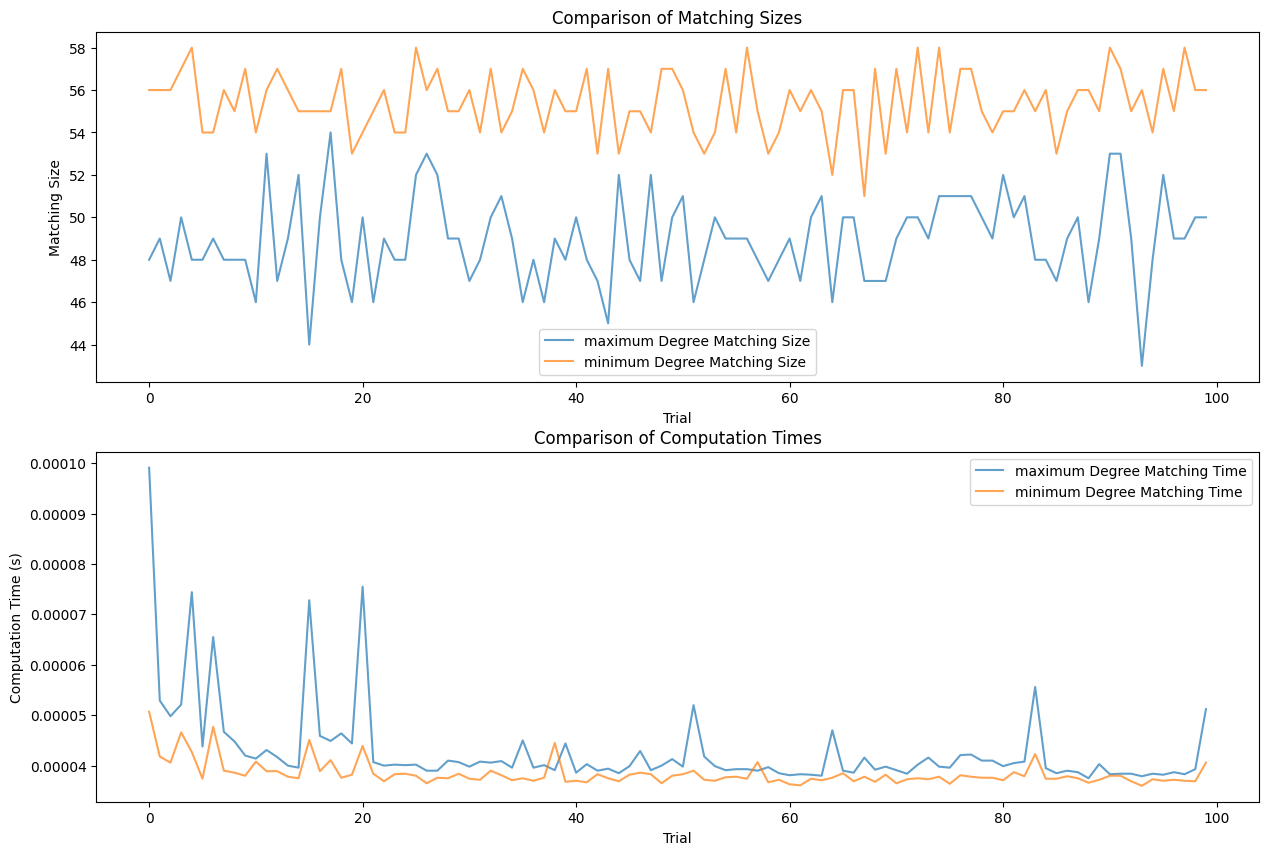

In [105]:
# file: graph_compare_min_max_match_and_speed.py
import matplotlib.pyplot as plt
import networkx as nx
import time
from matching_function import degree_matching

# graph parameters
n = 120
p = 0.04
num_trials = 100

# Lists to store results
maximum_degree_sizes = []
maximum_degree_times = []
minimum_degree_sizes = []
minimum_degree_times = []

# Match the pair of nodes but setting a time to count the execution speed during the operation
def evaluate_heuristics(graph):
    t_start = time.perf_counter()
    max_degree_match = degree_matching(graph, True)
    max_degree_time = time.perf_counter() - t_start

    t_start = time.perf_counter()
    min_degree_match = degree_matching(graph, False)
    min_degree_time = time.perf_counter() - t_start

    return len(max_degree_match), max_degree_time, len(min_degree_match), min_degree_time

# Perform the matching for each nb of trials
for _ in range(num_trials):
    graph = nx.gnp_random_graph(n, p)
    max_degree_size, max_degree_time, min_degree_size, min_degree_time = evaluate_heuristics(graph)
    
    # set the returned values inside the global statistics list
    maximum_degree_sizes.append(max_degree_size)
    maximum_degree_times.append(max_degree_time)
    minimum_degree_sizes.append(min_degree_size)
    minimum_degree_times.append(min_degree_time)

# set the size of the window
plt.figure(figsize=(15, 10))

# Create a plot to compare the matching size over the number of trials
plt.subplot(2, 1, 1)
plt.plot(maximum_degree_sizes, label='maximum Degree Matching Size', alpha=0.7)
plt.plot(minimum_degree_sizes, label='minimum Degree Matching Size', alpha=0.7)
plt.xlabel('Trial')
plt.ylabel('Matching Size')
plt.title('Comparison of Matching Sizes')
plt.legend()

# Create a plot to compare the execution time over the number of trials
plt.subplot(2, 1, 2)
plt.plot(maximum_degree_times, label='maximum Degree Matching Time', alpha=0.7)
plt.plot(minimum_degree_times, label='minimum Degree Matching Time', alpha=0.7)
plt.xlabel('Trial')
plt.ylabel('Computation Time (s)')
plt.title('Comparison of Computation Times')
plt.legend()

# Display the graphs on the screen
plt.show()

Other statistics about the max and min matching degree, and as we see on the graphs, the minimum matching degree function apply on the Erdös-Rendy random graph is way more performent and fast than the maximum one.

Statistical Comparison:
Mean Matching Size (Max Degree): 48.89
Mean Matching Size (Min Degree): 55.43
Mean Execution Time (Max Degree): 0.000049 seconds
Mean Execution Time (Min Degree): 0.000039 seconds


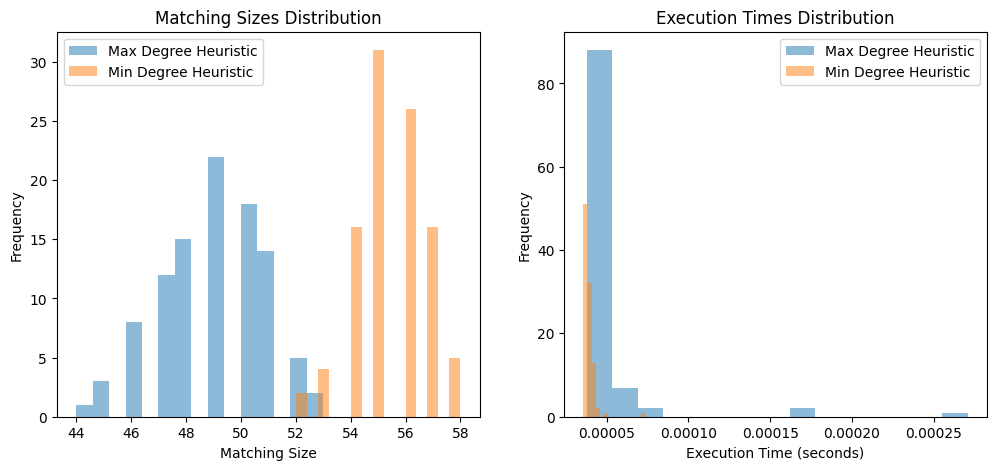

In [106]:
# file: more_statistics.py
import networkx as nx
import time
import statistics
import matplotlib.pyplot as plt
from matching_function import degree_matching

# graph parameters
n = 120
p = 0.04
num_trials = 100

# Lists to store results
maximum_degree_sizes = []
maximum_degree_times = []
minimum_degree_sizes = []
minimum_degree_times = []

# Match the pair of nodes but setting a time to count the execution speed during the operation
def evaluate_heuristics(graph):
    t_start = time.perf_counter()
    max_degree_match = degree_matching(graph, True)
    max_degree_time = time.perf_counter() - t_start

    t_start = time.perf_counter()
    min_degree_match = degree_matching(graph, False)
    min_degree_time = time.perf_counter() - t_start

    return len(max_degree_match), max_degree_time, len(min_degree_match), min_degree_time

# Perform the matching for each nb of trials
for _ in range(num_trials):
    graph = nx.gnp_random_graph(n, p)
    max_degree_size, max_degree_time, min_degree_size, min_degree_time = evaluate_heuristics(graph)
    
    # set the returned values inside the global statistics list
    maximum_degree_sizes.append(max_degree_size)
    maximum_degree_times.append(max_degree_time)
    minimum_degree_sizes.append(min_degree_size)
    minimum_degree_times.append(min_degree_time)

# get more statistical analysis about the values that we got using our heuristic function
mean_matching_size_max_degree = statistics.mean(maximum_degree_sizes)
mean_matching_size_min_degree = statistics.mean(minimum_degree_sizes)
mean_execution_time_max_degree = statistics.mean(maximum_degree_times)
mean_execution_time_min_degree = statistics.mean(minimum_degree_times)

# Print the results on the prompt
print("Statistical Comparison:")
print(f"Mean Matching Size (Max Degree): {mean_matching_size_max_degree}")
print(f"Mean Matching Size (Min Degree): {mean_matching_size_min_degree}")
print(f"Mean Execution Time (Max Degree): {mean_execution_time_max_degree:.6f} seconds")
print(f"Mean Execution Time (Min Degree): {mean_execution_time_min_degree:.6f} seconds")

# Set the window size
plt.figure(figsize=(12, 5))

# Create a plot to compare the matching size over the number of trials
plt.subplot(1, 2, 1)
plt.hist(maximum_degree_sizes, bins=15, alpha=0.5, label="Max Degree Heuristic")
plt.hist(minimum_degree_sizes, bins=15, alpha=0.5, label="Min Degree Heuristic")
plt.title("Matching Sizes Distribution")
plt.xlabel("Matching Size")
plt.ylabel("Frequency")
plt.legend()

# Create histograms to visualize execution times
plt.subplot(1, 2, 2)
plt.hist(maximum_degree_times, bins=15, alpha=0.5, label="Max Degree Heuristic")
plt.hist(minimum_degree_times, bins=15, alpha=0.5, label="Min Degree Heuristic")
plt.title("Execution Times Distribution")
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Frequency")
plt.legend()

# display the graphs on the screen
plt.show()

### Statistical Comparison:

Mean Matching Size (Max Degree): 48.94

Mean Matching Size (Min Degree): 55.23

Mean Execution Time (Max Degree): 0.000045 seconds

Mean Execution Time (Min Degree): 0.000042 seconds

In term to compare many types of graph to know which one is the best we created this file:

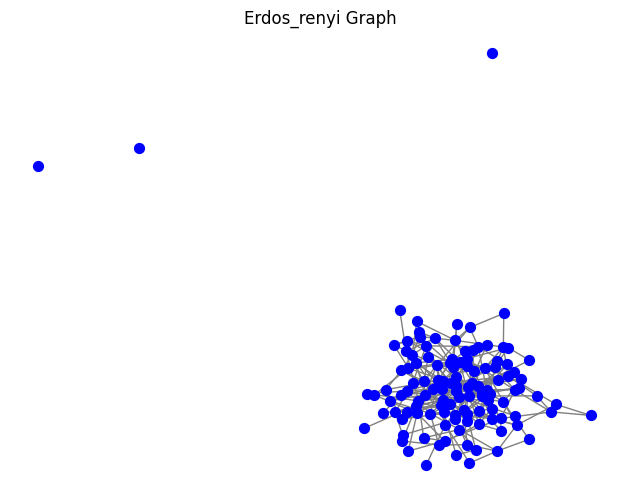

Erdos_renyi Graph:
Number of nodes: 120, Number of edges: 278
Greedy Degree Matching - Size: 49, Time: 0.000120s
Greedy Least Degree Matching - Size: 53, Time: 0.000061s
--------------------------------------------------------------------


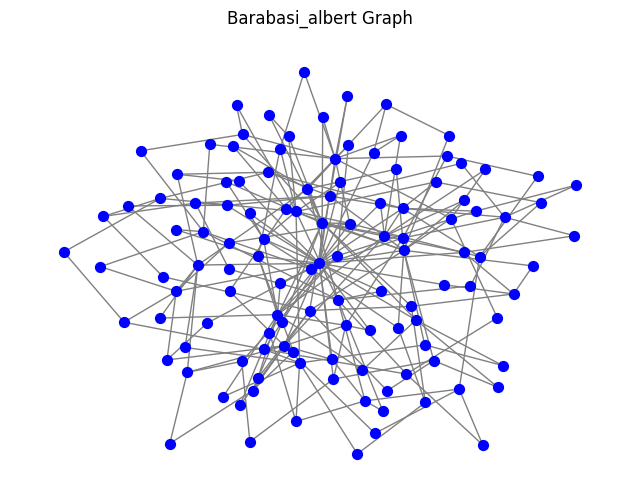

Barabasi_albert Graph:
Number of nodes: 120, Number of edges: 236
Greedy Degree Matching - Size: 42, Time: 0.000151s
Greedy Least Degree Matching - Size: 49, Time: 0.000045s
--------------------------------------------------------------------


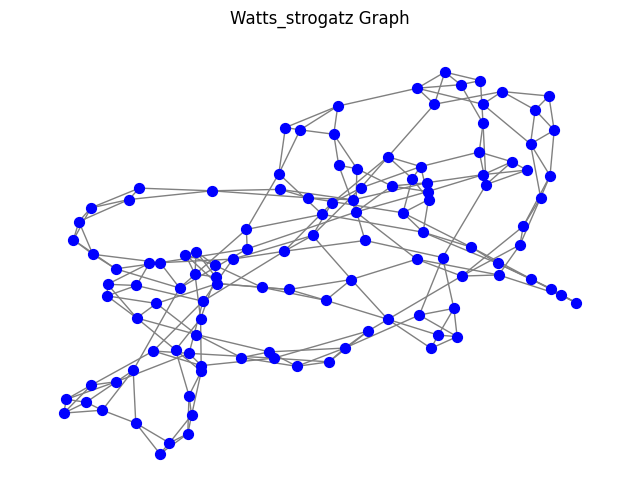

Watts_strogatz Graph:
Number of nodes: 120, Number of edges: 240
Greedy Degree Matching - Size: 55, Time: 0.000097s
Greedy Least Degree Matching - Size: 58, Time: 0.000042s
--------------------------------------------------------------------


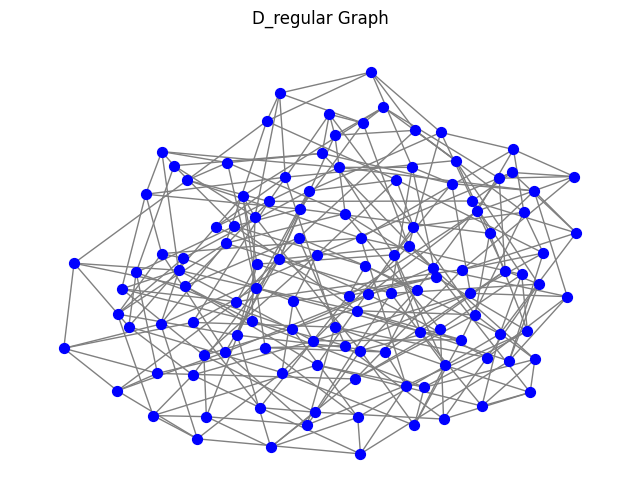

D_regular Graph:
Number of nodes: 120, Number of edges: 300
Greedy Degree Matching - Size: 55, Time: 0.000169s
Greedy Least Degree Matching - Size: 55, Time: 0.000064s
--------------------------------------------------------------------


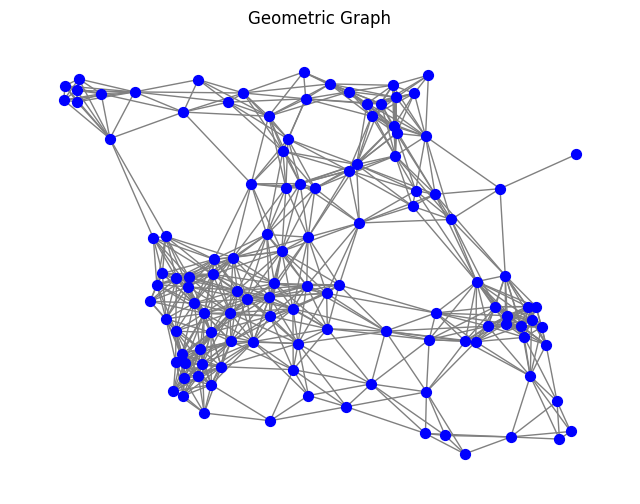

Geometric Graph:
Number of nodes: 120, Number of edges: 748
Greedy Degree Matching - Size: 56, Time: 0.000097s
Greedy Least Degree Matching - Size: 59, Time: 0.000044s
--------------------------------------------------------------------


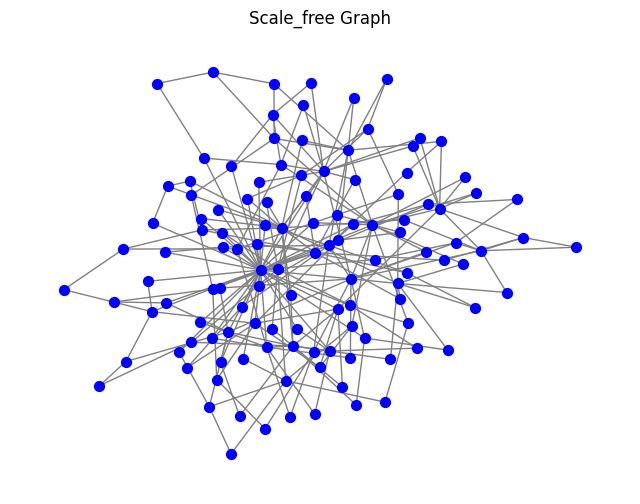

Scale_free Graph:
Number of nodes: 120, Number of edges: 236
Greedy Degree Matching - Size: 36, Time: 0.000108s
Greedy Least Degree Matching - Size: 47, Time: 0.000061s
--------------------------------------------------------------------


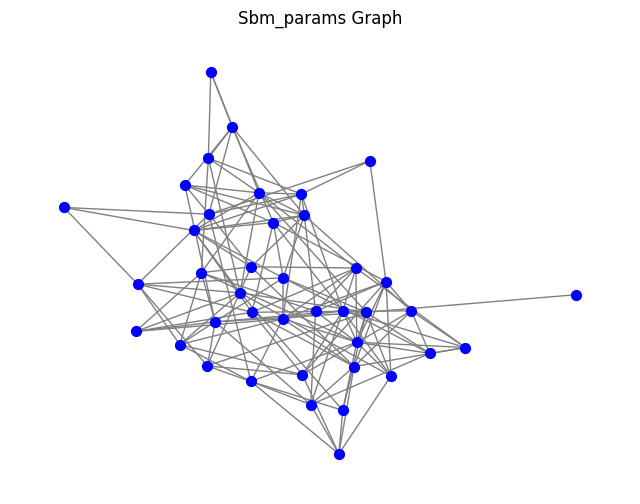

Sbm_params Graph:
Number of nodes: 40, Number of edges: 142
Greedy Degree Matching - Size: 18, Time: 0.000035s
Greedy Least Degree Matching - Size: 19, Time: 0.000015s
--------------------------------------------------------------------


In [110]:
# file: graph_types_comparision.py
import networkx as nx
import matplotlib.pyplot as plt
import time
from matching_function import degree_matching

# run the minimum and maximum degree matching function on each graph
def evaluate_heuristics(graph):
    t_start = time.perf_counter()
    greedy_match = degree_matching(graph, True)
    greedy_time = time.perf_counter() - t_start

    t_start = time.perf_counter()
    least_degree_match = degree_matching(graph, False)
    least_degree_time = time.perf_counter() - t_start

    return len(greedy_match), greedy_time, len(least_degree_match), least_degree_time

def generate_and_evaluate_graph(graph_type, is_display, **kwargs):
    try:
        # Generate a new graph based on the specified graph type
        if graph_type == "erdos_renyi":
            graph = nx.gnp_random_graph(kwargs["n"], kwargs["p"])
        elif graph_type == "barabasi_albert":
            graph = nx.barabasi_albert_graph(kwargs["n"], kwargs["m"])
        elif graph_type == "watts_strogatz":
            graph = nx.watts_strogatz_graph(kwargs["n"], kwargs["k"], kwargs["p"])
        elif graph_type == "d_regular":
            graph = nx.random_regular_graph(kwargs["d"], kwargs["n"])
        elif graph_type == "geometric":
            graph = nx.random_geometric_graph(kwargs["n"], kwargs["radius"])
        elif graph_type == "scale_free":
            graph = nx.powerlaw_cluster_graph(kwargs["n"], kwargs["m"], kwargs["p"])
        elif graph_type == "sbm_params":
            graph = nx.stochastic_block_model(kwargs["sizes"], kwargs["probs"])
        else:
            raise ValueError("Unknown graph type")

        # Display each generated graph if we set the is_display value to True
        if is_display:
            plt.figure(figsize=(8, 6))
            plt.title(f'{graph_type.capitalize()} Graph')
            nx.draw(graph, node_size=50, node_color='blue', edge_color='gray', with_labels=False)
            plt.show()

        # Evaluate the heuristics values for this graph
        size_greedy, time_greedy, size_least_degree, time_least_degree = evaluate_heuristics(graph)

        # Output graph statistics comparison result
        print(f"{graph_type.capitalize()} Graph:")
        print(f"Number of nodes: {graph.number_of_nodes()}, Number of edges: {graph.number_of_edges()}")
        print(f"Greedy Degree Matching - Size: {size_greedy}, Time: {time_greedy:.6f}s")
        print(f"Greedy Least Degree Matching - Size: {size_least_degree}, Time: {time_least_degree:.6f}s")
        print("--------------------------------------------------------------------")

    except Exception as e:
        print(f"Error generating or evaluating graph '{graph_type}': {e}")

# Parameters for different graph types
n = 120
erdos_renyi_params = {"n": n, "p": 0.04}
barabasi_albert_params = {"n": n, "m": 2}
watts_strogatz_params = {"n": n, "k": 4, "p": 0.1}
d_regular_params = {"n": n, "d": 5}
geometric_params = {"n": n, "radius": 0.2}
scale_free_params = {"n": n, "m": 2, "p": 0.1}
sbm_params = {"sizes": [20, 20], "probs": [[0.3, 0.1], [0.1, 0.3]]}

# Modify this variable to display or not each graph representation
is_graphs_display = True

# Generate and evaluate graph types
generate_and_evaluate_graph("erdos_renyi", is_graphs_display, **erdos_renyi_params)
generate_and_evaluate_graph("barabasi_albert", is_graphs_display, **barabasi_albert_params)
generate_and_evaluate_graph("watts_strogatz", is_graphs_display, **watts_strogatz_params)
generate_and_evaluate_graph("d_regular", is_graphs_display, **d_regular_params)
generate_and_evaluate_graph("geometric", is_graphs_display, **geometric_params)
generate_and_evaluate_graph("scale_free", is_graphs_display, **scale_free_params)
generate_and_evaluate_graph("sbm_params", is_graphs_display, **sbm_params)

# *CONCLUSION*

The experiment compares the performance of two heuristics matching algorithms maximal Degree Matching and minimal Degree Matching across differents types of graphs.

The different graphs are Erdős-Rényi, Barabási-Albert, Watts-Strogatz, D-regular, Geometric, Scale-free, and SBM (Stochastic Block Model).

### Here are the key observations:

### Matching Size:

Based on an overview, the minimal degree matching consistently produced larger or equal matching compared to the maximal degree matching on all graph types.

In the example that i took, the largest matching sizes was in the Geometric Graphs for both heuristics, with 58 and 59 matching founded.

Still in that example scale-free graphs showed the biggest difference in matching sizes, where the minimal degree matching are higher than the maximal degree matching by 11 matches (45 vs 34).

### Execution time:

Minimal degree matching are consistently faster than maxiaml degree matching on all graph types.

The fastest execution times were on the SBM graph, with minimal degree matching running on only 0.000033 seconds. (could be understood by the number of nodes, reduce because it took too much edges on the graph with 120 nodes and founded 60 pairs everytime).

The slowest execution time was for Scale-free Graphs using the maximal degree matching, on 0.000187 seconds.

### Graph characteristic:

The number of edges changed a lot for each graph types, which directly impact the performance of the matching sizes and execution time.

Geometric Graph have the highest number of edges (743).

Scale-free Graph and Barabási-Albert Graph, have both the same number of edges (236). But the Barabási-Albert Graph have a better matching size for both minimal and maximal degree matching.